# Exercises in linear regression

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

<h3>Exploring the dataset</h>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


df = pd.read_csv('EnergyEfficiency.csv')
display(df.head())
display(df.sample(frac=0.2))
display(df.tail())
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Columns: {df.columns.tolist()}")


,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
163,0.79,637.0,343.0,147.00,7.0,5,0.10,3,36.70,34.29
639,0.82,612.5,318.5,147.00,7.0,5,0.40,3,28.91,29.64
650,0.74,686.0,245.0,220.50,3.5,4,0.40,3,14.10,16.57
90,0.64,784.0,343.0,220.50,3.5,4,0.10,1,15.42,19.34
126,0.71,710.5,269.5,220.50,3.5,4,0.10,2,10.55,13.80
...,...,...,...,...,...,...,...,...,...,...
432,0.98,514.5,294.0,110.25,7.0,2,0.25,4,28.70,29.61
275,0.69,735.0,294.0,220.50,3.5,5,0.10,5,11.16,14.39
389,0.90,563.5,318.5,122.50,7.0,3,0.25,3,32.40,35.10
690,0.79,637.0,343.0,147.00,7.0,4,0.40,4,41.32,46.23


,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


Number of rows: 768
Number of columns: 10
Columns: ['RelativeCompactness', 'SurfaceArea', 'WallArea', 'RoofArea', 'OverallHeight', 'Orientation', 'GlazingArea', 'GlazingAreaDistribution', 'HeatingLoad', 'CoolingLoad']


<hr>
<h1>Exercise 1</h1>

<h1>Task 1 Do a visualization of the relationship/correlation between the variables <code>SurfaceArea</code> and <code>HeatingLoad</code>.</h1>

<h3>Visualization</h3>

<p> Scatter plot </p>

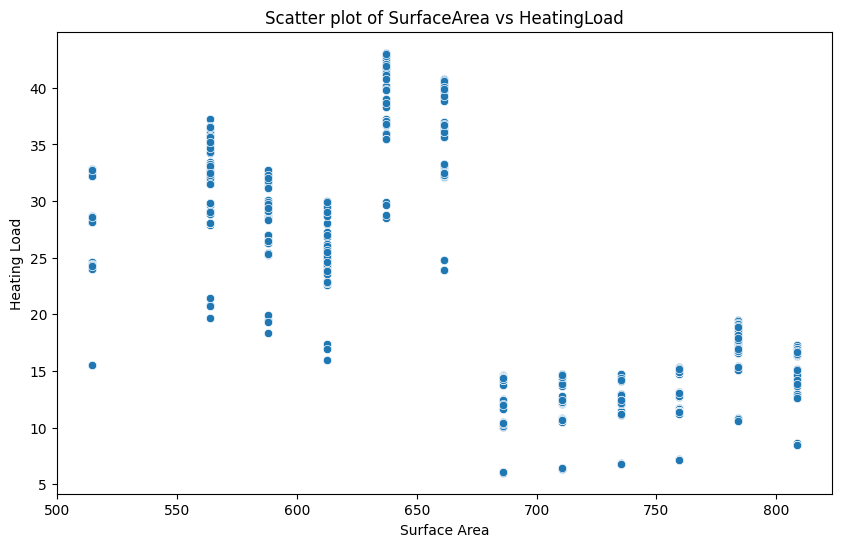

In [2]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='SurfaceArea', 
    y='HeatingLoad')
plt.title('Scatter plot of SurfaceArea vs HeatingLoad')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.show()


Just looking at the scatterplot, I find it interresting that it seems that as the surface area increase, the heating load decrease. This suggest <b>negativ correlation</b>

<hr>
<h1>Task 2 Is there a correlation between <code>SurfaceArea</code> and <code>HeatingLoad</code>? If so, what is the strength of it and is it statistically significant?.</h1>

<p>Calculating Pearson correlation coeficient often represented by r. Goes from -1 to 1</p>
<li>+1 = positive linear</li>
<li>0 = no linear relationship</li>
<li>-1 = negative linear</li>
<p>Strengh is calculated based on how close the correlation is to 0</p>
<li>0.1-0.3 = weak</li>
<li>0.3-0.6 = moderate</li>
<li>0.6-1 = strong</li>


In [3]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['SurfaceArea'], df['HeatingLoad'])

print(f"(r)Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

(r)Pearson correlation coefficient: -0.6581202267776216
P-value: 1.6869072902149069e-96


<h3> Results: </h3>
<p>The results show with r(-0.658) that there is a <b>negative correlation</b>.
<br>The value is also in the 0.6-1 range which proves the correlation is <b>Strong</b>

<p> <b>p-value</b>(1.6869072902149069e-96) is extremely low, (almost zero). Since we move the dicimal 96 places to the left. (95 zeros before the first digit start)
<br> This means that the result is <b>statistically significant</b>
<hr>

<h1>Task 3 Does the correlation make sense to you? What if you add <code>hue = "OverallHeight"</code> to your scatterplot?</h1>

<p>As mentioned earlier, it seems counter intuitive that more surface area should correlate with decrease in heating load</p>

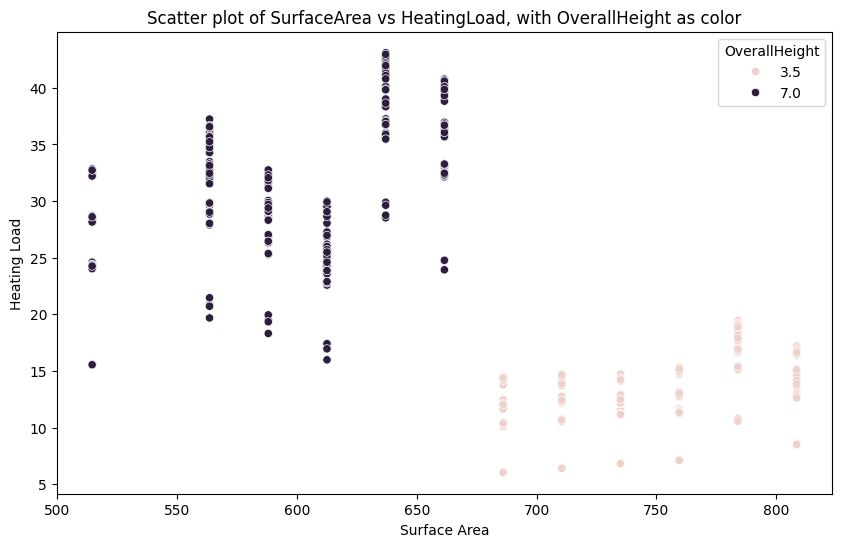

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='SurfaceArea', 
    y='HeatingLoad',
    hue='OverallHeight',)
plt.title('Scatter plot of SurfaceArea vs HeatingLoad, with OverallHeight as color')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.show()


<p>Looking at the scatter plot of <code>SurfaceArea</code> vs <code>HeatingLoad</code> colored by <code>OverallHeight</code>,
<br>the corralation makes way more sense, since it can be seen that all the houses with increased <b>SurfaceArea</b> above 670 ca.
<br> also have a way lower <b>overallHeigh</b>(0-3.5) while the houses with smaller <b>SurfaceArea</b> have increassed <b>overallHeight</b>(7.0).
<br> One theory to why this is happening could be that buildings with smaller surface area but greater height could still have more total volume inside</p>
<p>It reveals a grouping pattern<p>
<hr>

<h1>Task 4 Train a simple linear regression model with <code>SurfaceArea</code> as independent variable (x) and <code>HeatingLoad</code> as dependent variable (y).</h1>


The linear regression is a line that minizes the distance between the points and the line itself.

The slope [-0.07538716]
The Intercept 72.94538243006994


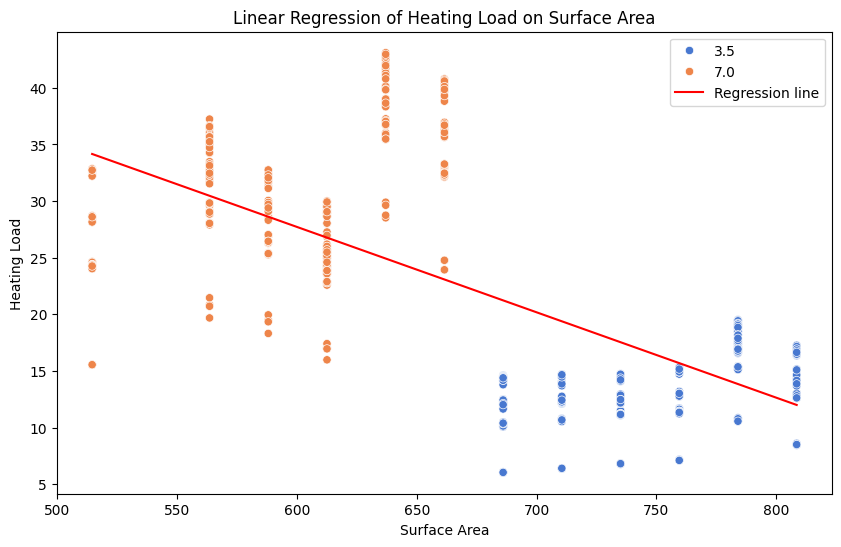

In [11]:
from sklearn.linear_model import LinearRegression

x = df[['SurfaceArea']]
y = df['HeatingLoad']
model = LinearRegression()
model.fit(x, y)

print(f"The slope",model.coef_)
print(f"The Intercept",model.intercept_)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='SurfaceArea', 
    y='HeatingLoad',
    hue='OverallHeight',
    palette = 'muted'
)
plt.plot(df['SurfaceArea'], model.predict(x), color='red', label='Regression line')
plt.title('Linear Regression of Heating Load on Surface Area')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.legend()
plt.show()

<h4>The results show that:</h4>
<p>The slope shows that hypothetical for each 1 unit of <code>SurfaceArea</code> the <code>HeatingLoad</code> decrease by 0.075</p>
<p>The intercept shows that hypothetical the <code>SurfaceArea</code> is 0 when <code>HeatLoad</code> is 72.95</p>
<hr>

<h1>Task 5 What does the model say about the change <code>HeatingLoad</code> when the <code>SurfaceArea</code> goes up by 1 unit?</h1>


<h3>This was answered in previous result:</h3>
<p>From reading the slope, if <code>SurfaceArea</code> goes up by 1 unit <code>HeatingLoad</code> decrease by 0.075</p></h2>
<hr>

<h1>Task 6 Add the linear regression line to a scatterplot of <code>SurfaceArea</code> and <code>HeatingLoad</code>.


<p>Already done in task 4, but lets just repeat</p>

The slope [-0.07538716]
The Intercept 72.94538243006994


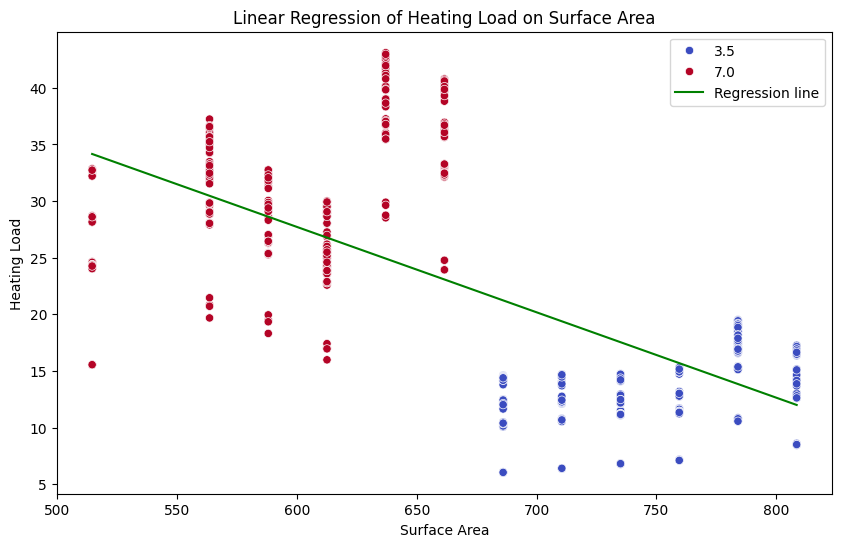

In [10]:
from sklearn.linear_model import LinearRegression

x = df[['SurfaceArea']]
y = df['HeatingLoad']
model = LinearRegression()
model.fit(x, y)

print(f"The slope",model.coef_)
print(f"The Intercept",model.intercept_)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='SurfaceArea', 
    y='HeatingLoad',
    hue='OverallHeight',
    palette = 'coolwarm'
)
plt.plot(df['SurfaceArea'], model.predict(x), color='green', label='Regression line')
plt.title('Linear Regression of Heating Load on Surface Area')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.legend()
plt.show()

<hr>
<h1>Task 7 Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.</h1>

In [7]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(x)

r2 = r2_score(y, y_pred)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

x_const = sm.add_constant(x)
model = sm.OLS(y, x_const).fit()

print(model.summary())

R-squared: 0.433
RMSE: 7.592
                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           1.69e-96
Time:                        03:44:42   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.945

<h3> Evaulutation :</h3> 
<li>R-Square(0.433) =</li>
<li>RMSE(7.592)</li>
<li>Intercept p-value(0.00)</li>
<li>SurfaceArea(0.00)</li>
<li>F-statistic(585.3)</li>
<li>Prob (F-statistic)(1.69e-96)</li>
<li>Residual diagnostic</li>

<hr>
<h1>Exercise 2</h1>

<h1>Task 1 Train a multiple linear regression model for <code>HeatingLoad</code> using at least two other variables from the dataset as feature variables.</h1>

<h1>Task 2 Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?</h1>

<h1>Task 3 Check each of the assumptions/problems for linear regression.</h1>